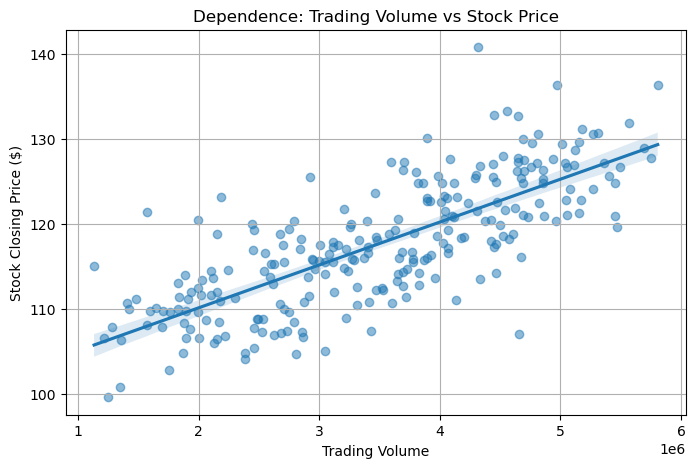

📌 Covariance: 6501403.1279
📌 Pearson Correlation: 0.7619
📌 Spearman Correlation: 0.7772
✅ Strong dependence between Trading Volume and Stock Price (Pearson).
✅ Strong dependence between Trading Volume and Stock Price (Spearman).


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# 📌 Step 1: Generate Synthetic Stock Market Data
np.random.seed(42)
days = 252  # Number of trading days (1 year)

# Simulating trading volume (random but increasing trend)
trading_volume = np.random.randint(1000000, 5000000, days) + np.linspace(0, 1000000, days)

# Simulating stock price (influenced by trading volume)
stock_price = 100 + 0.000005 * trading_volume + np.random.normal(0, 5, days)

# Create a DataFrame
stock_data = pd.DataFrame({
    "Trading Volume": trading_volume,
    "Stock Closing Price": stock_price
})

# 📌 Step 2: Compute Covariance
cov_value = np.cov(stock_data["Trading Volume"], stock_data["Stock Closing Price"])[0, 1]

# 📌 Step 3: Compute Pearson Correlation
pearson_corr = stock_data["Trading Volume"].corr(stock_data["Stock Closing Price"])

# 📌 Step 4: Compute Spearman Rank Correlation
spearman_corr, _ = spearmanr(stock_data["Trading Volume"], stock_data["Stock Closing Price"])

# 📌 Step 5: Visualize the Relationship
plt.figure(figsize=(8, 5))
sns.regplot(x=stock_data["Trading Volume"], y=stock_data["Stock Closing Price"], scatter_kws={"alpha": 0.5})
plt.xlabel("Trading Volume")
plt.ylabel("Stock Closing Price ($)")
plt.title("Dependence: Trading Volume vs Stock Price")
plt.grid(True)
plt.show()

# 📌 Step 6: Print Results
print(f"📌 Covariance: {cov_value:.4f}")
print(f"📌 Pearson Correlation: {pearson_corr:.4f}")
print(f"📌 Spearman Correlation: {spearman_corr:.4f}")

# 📌 Step 7: Interpretation
if abs(pearson_corr) > 0.7:
    print("✅ Strong dependence between Trading Volume and Stock Price (Pearson).")
elif abs(pearson_corr) > 0.4:
    print("⚠️ Moderate dependence between Trading Volume and Stock Price (Pearson).")
else:
    print("❌ Weak dependence between Trading Volume and Stock Price (Pearson).")

if abs(spearman_corr) > 0.7:
    print("✅ Strong dependence between Trading Volume and Stock Price (Spearman).")
elif abs(spearman_corr) > 0.4:
    print("⚠️ Moderate dependence between Trading Volume and Stock Price (Spearman).")
else:
    print("❌ Weak dependence between Trading Volume and Stock Price (Spearman).")